# Tarefa prática 1 - pré-processamento de dados

Nesta atividade, devem clonar o repositório GitHub da disciplina nos seus discos locais e fazer um git push com o seu código e relatórios para que possam ser avaliados. 

Repositório: https://github.com/renatoquiliche/DataScience-PUCRio-FB

1 - Carregar o dataset Data Science Job Salaries no software utilizado e gerar estatísticas descritivas (extra: desenvolver os exercícios 1, 2, 3 e 4 usando o dataset do seus projetos da disciplina).

In [1]:
import pandas as pd
import datetime

In [2]:
df = pd.read_csv('/home/cynthia.vianna/Documentos/meupc/MESTRADO/DataScience-PUCRio-FB/Data/DS_salarios/ds_salaries.csv')

In [3]:
df.drop(columns = ["Unnamed: 0"], errors = "ignore",inplace = True)

In [4]:
df['data'] = pd.to_datetime({'year':df.work_year, 'month':df.work_month,'day':1})
# df.drop(columns = ["work_year", "work_month"], errors = "ignore",inplace = True)

In [5]:
# df.columns

In [6]:
df = df[["data","work_year", "work_month" ,"job_title","experience_level","employment_type","employee_residence",
         "salary","salary_currency", "salary_in_usd","remote_ratio", "company_location", "company_size"]]

In [7]:
# df["cotacao_dolar"]=df["salary_in_usd"]/df["salary"]

In [8]:
df["salary_in_usd"].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

<AxesSubplot:xlabel='work_year'>

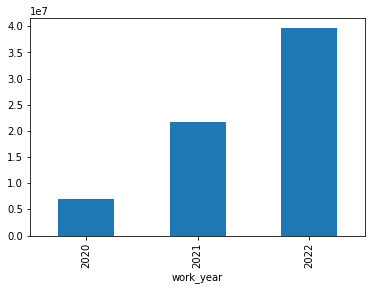

In [9]:
df.groupby(df.work_year)["salary_in_usd"].sum().plot.bar()

In [10]:
# top 3 profissoes no quesito salario:
rank=df.groupby(['job_title','experience_level','company_size'])['salary_in_usd'].agg(['count', 'sum', 'mean']).reset_index().sort_values(['mean'], ascending=[False])
rank.head(3)

,job_title,experience_level,company_size,count,sum,mean
145,Principal Data Engineer,EX,L,1,600000,600000.0
97,Financial Data Analyst,MI,L,1,450000,450000.0
148,Principal Data Scientist,EX,S,1,416000,416000.0


In [11]:
# bottom 3 profissoes no quesito salario:
rank.tail(3)

,job_title,experience_level,company_size,count,sum,mean
152,Product Data Analyst,MI,L,1,6072,6072.0
70,Data Science Consultant,EN,M,1,5707,5707.0
0,3D Computer Vision Researcher,MI,M,1,5409,5409.0


In [12]:
df.head(5)

,data,work_year,work_month,job_title,experience_level,employment_type,employee_residence,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,2020-06-01,2020,6,Data Scientist,MI,FT,DE,70000,EUR,79833,0,DE,L
1,2020-11-01,2020,11,Machine Learning Scientist,SE,FT,JP,260000,USD,260000,0,JP,S
2,2020-12-01,2020,12,Big Data Engineer,SE,FT,GB,85000,GBP,109024,50,GB,M
3,2020-06-01,2020,6,Product Data Analyst,MI,FT,HN,20000,USD,20000,0,HN,S
4,2020-10-01,2020,10,Machine Learning Engineer,SE,FT,US,150000,USD,150000,50,US,L


2 - Aplicar uma técnica de amostragem (sugestão: aplicar bootstrap)

<AxesSubplot:>

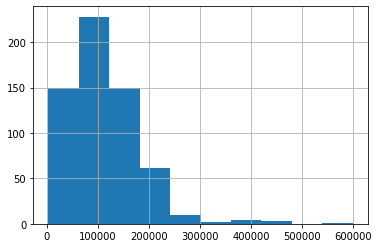

In [13]:
df["salary_in_usd"].hist()

In [14]:
#bootstrapping
bootstrap=pd.DataFrame({'mean_salary':[df.sample(500,replace=True)["salary_in_usd"].mean() for i in range(0,1000)]})
 
bootstrap

,mean_salary
0,109994.000
1,110672.896
2,109479.306
3,114523.136
4,117370.678
...,...
995,109679.408
996,110102.554
997,119200.652
998,112199.476


<AxesSubplot:>

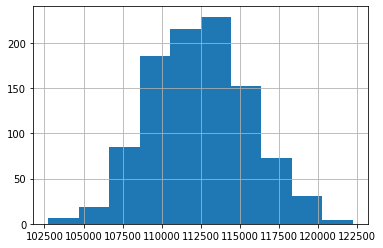

In [15]:
bootstrap['mean_salary'].hist()

In [16]:
(bootstrap['mean_salary'].quantile(0.025),bootstrap['mean_salary'].quantile(0.975))

(106662.72925, 118714.995)

In [17]:
df["salary_in_usd"].mean()

112297.86985172982

3 - Aplicar uma técnica de discretização (sugestão: transformar variável numérica em quantiles)

In [18]:
def faixas(salary_in_usd): 
    if   salary_in_usd <= df["salary_in_usd"].quantile(.25):        
        return '1'
    elif salary_in_usd >  df["salary_in_usd"].quantile(.25)  and salary_in_usd <= df["salary_in_usd"].quantile(.5):        
        return '2'    
    elif salary_in_usd >  df["salary_in_usd"].quantile(.5)  and salary_in_usd <= df["salary_in_usd"].quantile(.75):   
        return '3'
    elif salary_in_usd >= df["salary_in_usd"].quantile(.75):  
        return '4'  

df['QUARTIL'] = df["salary_in_usd"].map(faixas)

In [19]:
#verificando

In [20]:
df["salary_in_usd"].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [21]:
df.groupby(['QUARTIL'])["salary_in_usd"].agg(['min','max'])

,min,max
QUARTIL,,
1,2859,62726
2,63711,101570
3,102100,150000
4,150075,600000


4 - Aplicar uma técnica de Feature Engineering (sugestão: aplicar uma funçao que transforme os campos de ano e mês na quantidade de meses transcorrido desde uma data inicial. Por exemplo, ano 2020/mês 6 representariam 30 meses de antiguidade)

In [22]:
df["data_max"] = df.data.max()

In [23]:
df["aux"] = df["data_max"] - df["data"]
df['dias'] = df.aux.astype('timedelta64[D]')
df['meses']=round((df.dias/30.5),0)

In [24]:
df

,data,work_year,work_month,job_title,experience_level,employment_type,employee_residence,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size,QUARTIL,data_max,aux,dias,meses
0,2020-06-01,2020,6,Data Scientist,MI,FT,DE,70000,EUR,79833,0,DE,L,2,2022-12-01,913 days,913.0,30.0
1,2020-11-01,2020,11,Machine Learning Scientist,SE,FT,JP,260000,USD,260000,0,JP,S,4,2022-12-01,760 days,760.0,25.0
2,2020-12-01,2020,12,Big Data Engineer,SE,FT,GB,85000,GBP,109024,50,GB,M,3,2022-12-01,730 days,730.0,24.0
3,2020-06-01,2020,6,Product Data Analyst,MI,FT,HN,20000,USD,20000,0,HN,S,1,2022-12-01,913 days,913.0,30.0
4,2020-10-01,2020,10,Machine Learning Engineer,SE,FT,US,150000,USD,150000,50,US,L,3,2022-12-01,791 days,791.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022-05-01,2022,5,Data Engineer,SE,FT,US,154000,USD,154000,100,US,M,4,2022-12-01,214 days,214.0,7.0
603,2022-06-01,2022,6,Data Engineer,SE,FT,US,126000,USD,126000,100,US,M,3,2022-12-01,183 days,183.0,6.0
604,2022-11-01,2022,11,Data Analyst,SE,FT,US,129000,USD,129000,0,US,M,3,2022-12-01,30 days,30.0,1.0
605,2022-02-01,2022,2,Data Analyst,SE,FT,US,150000,USD,150000,100,US,M,3,2022-12-01,303 days,303.0,10.0
